In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
df.assign(color=load_iris()['target']).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


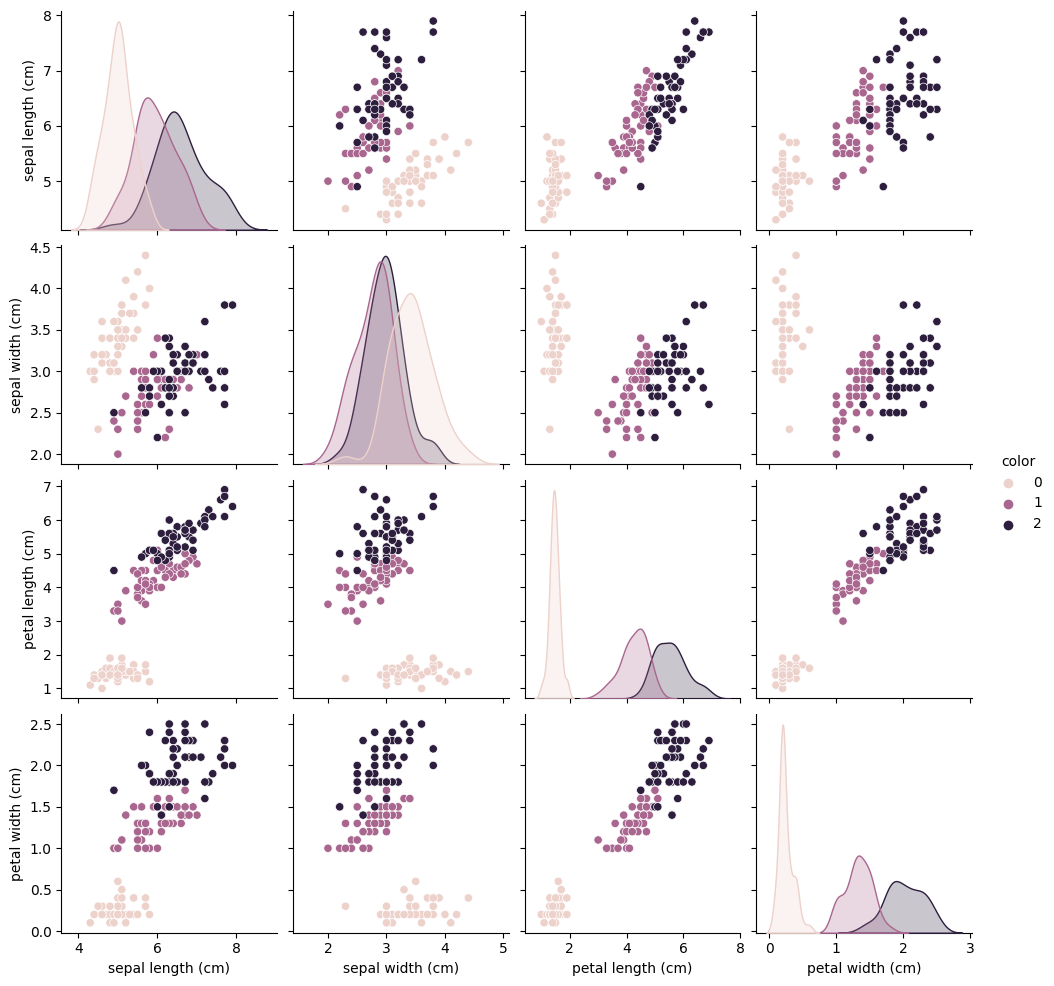

In [7]:
sns.pairplot(df.assign(color=load_iris()['target']), hue='color')

In [8]:
x=df-df.mean(axis=0)
x.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [9]:
cov=np.dot(x.T, x)/df.shape[0]
eigenvalues, eigenvectors=np.linalg.eig(cov)
eigenvalues/sum(eigenvalues)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [10]:
loadings=pd.DataFrame(eigenvectors.T, index=df.columns, columns=["PC{}".format(str(x)) for x in range(eigenvectors.T.shape[1])])

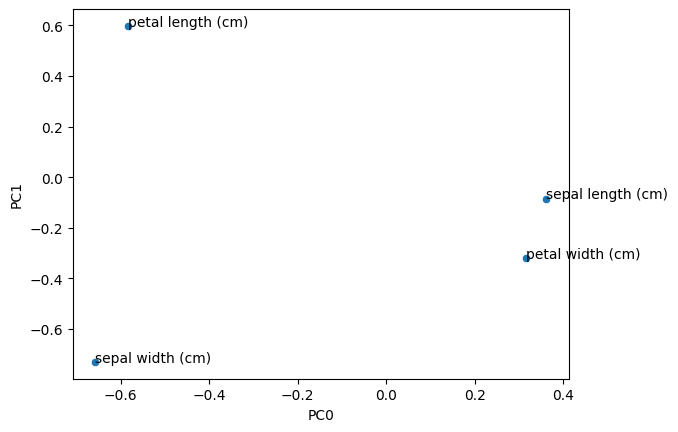

In [11]:
f=sns.scatterplot(data=loadings, x='PC0', y='PC1')
f.grid
for i in range(loadings.shape[0]):
  f.text(loadings.iloc[i,0], loadings.iloc[i, 1], s=loadings.index[i])

<Axes: xlabel='0', ylabel='1'>

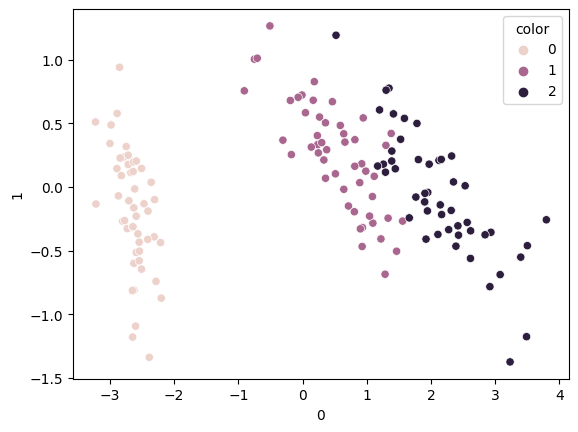

In [12]:
scores=pd.DataFrame(x.values.dot(eigenvectors[:,:2]))
sns.scatterplot(data=scores.assign(color=load_iris()['target']),  x=0, y=1, hue='color')

In [13]:
pca=PCA(n_components=2, )
pd.DataFrame(pca.fit_transform(df))

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [14]:
def varimax(Phi, gamma = 1, q = 30, tol = 1e-6):
  from numpy import eye, asarray, dot, sum, diag
  from numpy.linalg import svd
  p, k = Phi.shape
  R = eye(k)
  d=0
  for i in range(q):
    d_old = d
    Lambda = dot (Phi, R)
    u,S,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
    R = dot(u,vh)
    d = sum(S)
    if d/d_old < tol: break
  return dot (Phi, R)

In [15]:
pd.DataFrame(np.around(varimax(eigenvectors[:,:2]), 3))

<ipython-input-14-00214ad237b6>:13: RuntimeWarning: divide by zero encountered in double_scalars
  if d/d_old < tol: break


,0,1
0,0.220,-0.716
1,-0.232,-0.698
2,0.874,-0.005
3,0.366,0.001


<ipython-input-14-00214ad237b6>:13: RuntimeWarning: divide by zero encountered in double_scalars
  if d/d_old < tol: break


<Axes: xlabel='0', ylabel='1'>

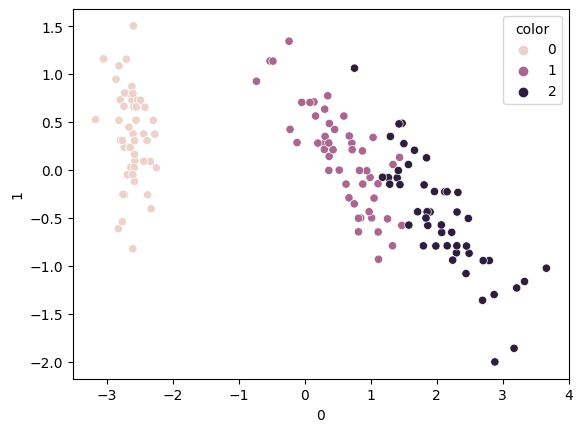

In [16]:
scores1=pd.DataFrame(x.values.dot(varimax(eigenvectors[:,:2])))
sns.scatterplot(data=scores1.assign(color=load_iris()['target']),  x=0, y=1, hue='color')

<ipython-input-14-00214ad237b6>:13: RuntimeWarning: divide by zero encountered in double_scalars
  if d/d_old < tol: break


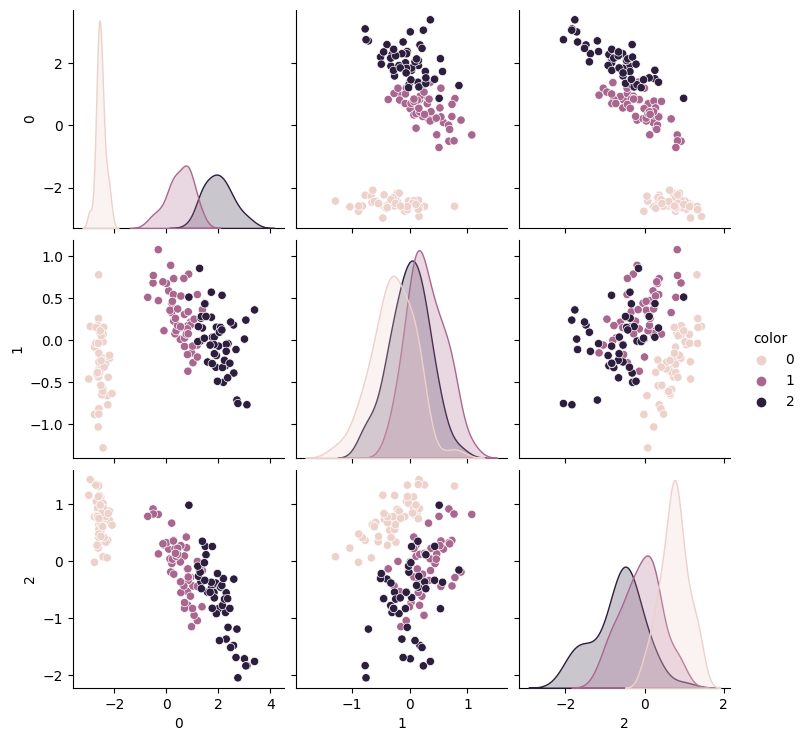

In [17]:
scores1=pd.DataFrame(x.values.dot(varimax(eigenvectors[:,:3])))
sns.pairplot(scores1.assign(color=load_iris()['target']), hue='color')

## Laba

In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
x=df.iloc[:,1:-1]
y=df.iloc[:,-1].values

--2023-08-07 15:13:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [   <=>              ]   5.28M  9.49MB/s    in 0.6s    

2023-08-07 15:14:00 (9.49 MB/s) - ‘default of credit card clients.xls’ saved [5539328]



In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_train, y_train)
print('Accuracy:', accuracy_score(y_test, rfc.predict(x_test)))

Accuracy: 0.8061111111111111


In [60]:
pca=PCA()
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)
ev=pca.explained_variance_ratio_
ev

array([0.34497227, 0.20972293, 0.11796553, 0.09677852, 0.06836124,
       0.0454349 , 0.03353372, 0.0192561 , 0.01804719, 0.01518026,
       0.01243988, 0.0095812 , 0.00872627])

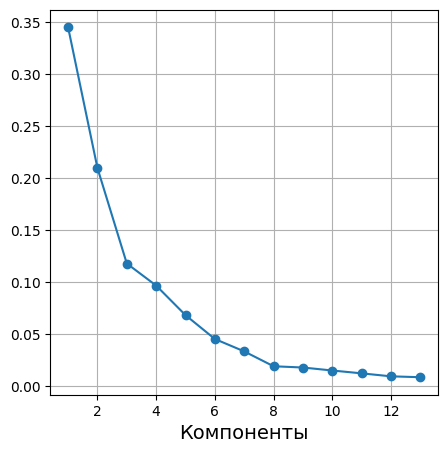

In [61]:
ev=pca.explained_variance_
pv=ev/np.sum(ev)
plt.figure(figsize=(5,5))
plt.plot(np.arange(1, len(pv)+1), pv, marker = 'o')
plt.xlabel('Компоненты', size = 14)

plt.grid(True)


In [70]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
ada=AdaBoostClassifier()
x=load_wine()['data']
y=load_wine()['target']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
ada.fit(x_train, y_train)
print('Report:', classification_report(y_test, ada.predict(x_test)))

Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.86      0.82      0.84        22
           2       0.86      0.92      0.89        13

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.87      0.87      0.87        54



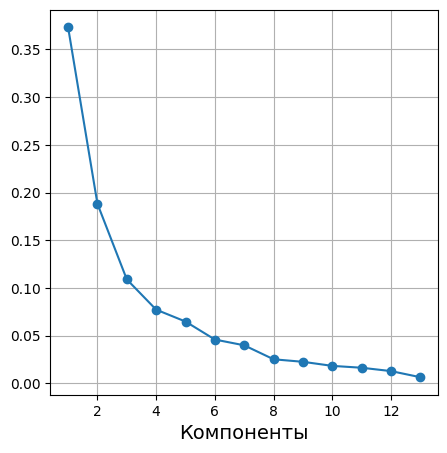

In [73]:
pca=PCA()
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
ev=pca.explained_variance_
pv=ev/np.sum(ev)
plt.figure(figsize=(5,5))
plt.plot(np.arange(1, len(pv)+1), pv, marker = 'o')
plt.xlabel('Компоненты', size = 14)

plt.grid(True)

In [77]:
ada.fit(x_train_pca, y_train)
print('Report:', classification_report(y_test, ada.predict(x_test_pca)))

Report:               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.88      0.95      0.91        22
           2       1.00      0.92      0.96        13

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



In [83]:
pca=PCA(n_components=3)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
ada.fit(x_train_pca, y_train)
print('Report:', classification_report(y_test, ada.predict(x_test_pca)))

Report:               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

